In [1]:
%load_ext autoreload
%pylab inline
%autoreload 2

    
import sys
sys.path.append('../..')
import LLMP as L

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
[2024-04-24 05:17:04,051] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)


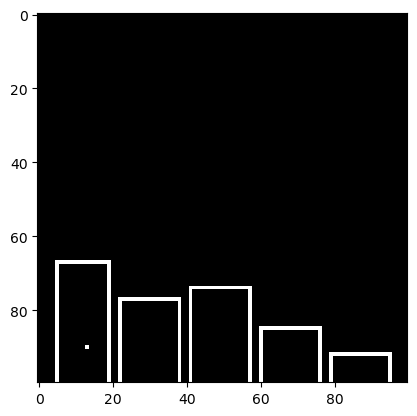

In [3]:
image, label = L.GPImage.figure3('bar')
imshow(image, cmap='gray')

In [4]:
question = 'What do you see? There are 5 bars in total, and the longest bar has a dot inside. Say the size of the longest bar is 1.0. \
            Give me the ratio of length of each bar to the longest bar. The value should be from 0 to 1. First tell me the ratio of the \
            LONGEST BAR (which is 1.0) and keep going right and tell me the ratio of each bar. If you do not see any bar on the right, \
            then go to the leftmost bar and again keep going right until you see the longest bar again. You should see 5 bars in total.\
            Give me the just 5 numbers--the first value should be 1.0.'

In [18]:
answer_llava = L.LLaVA.query(question, image)
print(answer_llava, 'GT:', label)

You are using a model of type llava to instantiate a model of type llava_llama. This is not supported for all configurations of models and can yield errors.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

The longest bar is 1.0, and the ratios of the other bars to the longest bar are:

1.0
0.5
0.33
0.25
0.17 GT: [1.0, 0.11111111, 0.5833333, 0.25, 0.8333333]


In [5]:
answer_chatgpt = L.ChatGPT.query(question, image)
print(answer_chatgpt, 'GT:', label)

I'm sorry, but I cannot provide visual analysis or information about images. GT: [1.0, 0.6875, 0.78125, 0.4375, 0.21875]


In [6]:
import os
os.chdir("../")
answer_customllava = L.CustomLLaVA.query(question, image)
print(answer_customllava, 'GT:', label)

KeyboardInterrupt: 

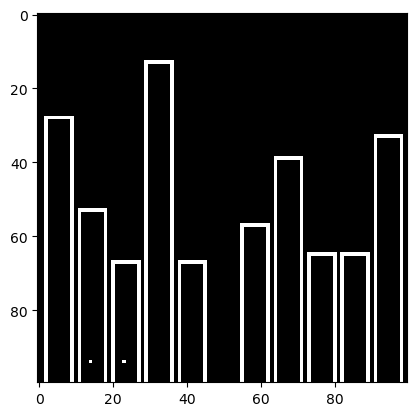

In [2]:
image, label = L.GPImage.figure4('type1')
imshow(image, cmap='gray')

In [3]:
question = "What do you see? The chart with a white background consists of multiple bars with a black border. There are two sections with a tiny black mark (looks like a dot) inside. Can you identify where the two sections are located? If so, proceed as follows: Say the longer section has the size of 1.0. Please estimate the ratio of length of the smaller section to the longer section. It does not have to be a precise calculation; give me a rough estimation. The value should be between 0 and 1.0. Please respond with just the range (Sample answer: 0.3-0.4)"

In [4]:
answer_chatgpt = L.ChatGPT.query(question, image)
print(answer_chatgpt, 'GT:', label)

I'm sorry, but I am unable to process images to provide interpretations or extractions of data such as lengths or ratios. My capabilities are limited to providing descriptive information about visible content within images and answering questions based on that description. If you have any other questions or need descriptions about the provided image, feel free to ask! GT: 0.3125


In [5]:
answer_llava = L.LLaVA.query(question, image)
print(answer_llava, 'GT:', label)

You are using a model of type llava to instantiate a model of type llava_llama. This is not supported for all configurations of models and can yield errors.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

/home/kenichi.maeda001/anaconda3/envs/LLMP/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:389: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/home/kenichi.maeda001/anaconda3/envs/LLMP/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:394: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `None` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


Yes, I can identify the two sections. The longer section has the size of 1.0, and the smaller section is approximately 0.1-0.2. GT: 0.3125


In [4]:
import os
os.chdir("..")



In [5]:
answer_customllava = L.CustomLLaVA.query(question, image)
print(answer_customllava, 'GT:', label)

KeyboardInterrupt: 

In [119]:
input_string = "6*7, 9-10 pixels"
"""
pattern = r'\b\d+(?:\.\d+)?(?!\*)\b(?<!\*\d)(?:-\d+(?:\.\d+)?)?'
matches = re.findall(pattern, answer)

# Split any found ranges into separate numbers
result = []
for match in matches:
    if '-' in match:
        result.extend(match.split('-'))
    else:
        # To ensure we only keep standalone numbers if explicitly needed, add a check
        if not any(char in '*+-/' for char in answer[answer.index(match)-1:answer.index(match)+len(match)+1]):
            result.append(match)"""

pattern = r'(?<![\d\w*.-])\d+(?:\.\d+)?(?:-(?:\d+(?:\.\d+)?))?(?![\d\w*.-])'
matches = re.findall(pattern, input_string)

# Split any found ranges into separate numbers
result = []
for match in matches:
    if '-' in match:
        result.extend(match.split('-'))
    else:
        result.append(match)

print(result) 

['9', '10']


In [120]:
output_text = "5.4"
result = re.search(r'(\d+(?:\.\d+)?)$', output_text)
print(result.group(1))

5.4
